In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [26]:
df = pd.read_csv('heart_disease.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,4,140,260,0,1,112,1,3,2,?,?,2
1,44,1,4,130,209,0,1,127,0,0,?,?,?,0
2,60,1,4,132,218,0,1,140,1,1.5,3,?,?,2
3,55,1,4,142,228,0,1,149,1,2.5,1,?,?,1
4,66,1,3,110,213,1,2,99,1,1.3,2,?,?,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,54,0,4,127,333,1,1,154,0,0,?,?,?,1
196,62,1,1,?,139,0,1,?,?,?,?,?,?,0
197,55,1,4,122,223,1,1,100,0,0,?,?,6,2
198,58,1,4,?,385,1,2,?,?,?,?,?,?,0


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   age       200 non-null    int64 
 1   sex       200 non-null    int64 
 2   cp        200 non-null    int64 
 3   trestbps  200 non-null    object
 4   chol      200 non-null    object
 5   fbs       200 non-null    object
 6   restecg   200 non-null    int64 
 7   thalach   200 non-null    object
 8   exang     200 non-null    object
 9   oldpeak   200 non-null    object
 10  slope     200 non-null    object
 11  ca        200 non-null    object
 12  thal      200 non-null    object
 13  target    200 non-null    int64 
dtypes: int64(5), object(9)
memory usage: 22.0+ KB


In [38]:
df.replace({'?':np.nan},inplace=True)

In [39]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,4,140,260,0,1,112,1,3,2,NaN,NaN,2
1,44,1,4,130,209,0,1,127,0,0,NaN,NaN,NaN,0
2,60,1,4,132,218,0,1,140,1,1.5,3,NaN,NaN,2
3,55,1,4,142,228,0,1,149,1,2.5,1,NaN,NaN,1
4,66,1,3,110,213,1,2,99,1,1.3,2,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,54,0,4,127,333,1,1,154,0,0,NaN,NaN,NaN,1
196,62,1,1,NaN,139,0,1,NaN,NaN,NaN,NaN,NaN,NaN,0
197,55,1,4,122,223,1,1,100,0,0,NaN,NaN,6,2
198,58,1,4,NaN,385,1,2,NaN,NaN,NaN,NaN,NaN,NaN,0


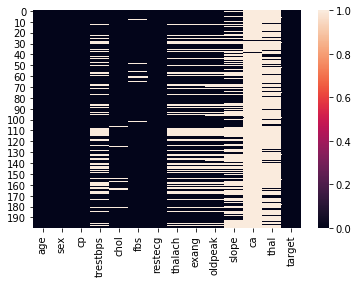

In [41]:
sns.heatmap(df.isna())

In [50]:
# since they are almost null
df.drop(['slope','ca','thal'],axis=1,inplace=True)

In [56]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'target'],
      dtype='object')

In [51]:
from sklearn.impute import SimpleImputer

In [59]:
si = SimpleImputer(strategy='mean')

df['trestbps']= si.fit_transform(df['trestbps'].values.reshape(-1,1))
df['chol']= si.fit_transform(df['chol'].values.reshape(-1,1))
df['fbs']= si.fit_transform(df['fbs'].values.reshape(-1,1))
df['thalach']= si.fit_transform(df['thalach'].values.reshape(-1,1))
df['exang']= si.fit_transform(df['exang'].values.reshape(-1,1))
df['oldpeak']= si.fit_transform(df['oldpeak'].values.reshape(-1,1))

In [60]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target
0,63,1,4,140.000000,260.0,0.0,1,112.000000,1.000000,3.000000,2
1,44,1,4,130.000000,209.0,0.0,1,127.000000,0.000000,0.000000,0
2,60,1,4,132.000000,218.0,0.0,1,140.000000,1.000000,1.500000,2
3,55,1,4,142.000000,228.0,0.0,1,149.000000,1.000000,2.500000,1
4,66,1,3,110.000000,213.0,1.0,2,99.000000,1.000000,1.300000,0
...,...,...,...,...,...,...,...,...,...,...,...
195,54,0,4,127.000000,333.0,1.0,1,154.000000,0.000000,0.000000,1
196,62,1,1,133.763889,139.0,0.0,1,122.795918,0.646259,1.320833,0
197,55,1,4,122.000000,223.0,1.0,1,100.000000,0.000000,0.000000,2
198,58,1,4,133.763889,385.0,1.0,2,122.795918,0.646259,1.320833,0


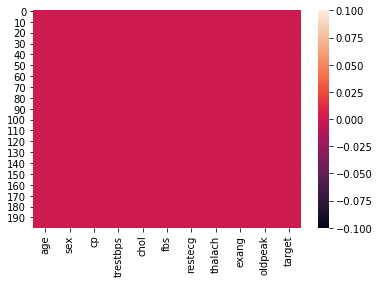

In [61]:
sns.heatmap(df.isna())

In [62]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,59.350000,0.970000,3.505000,133.763889,178.746114,0.352332,0.735000,122.795918,0.646259,1.320833,1.520000
std,7.811697,0.171015,0.795701,18.257507,112.011633,0.470440,0.683455,18.835692,0.410940,0.937755,1.219441
min,35.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,69.000000,0.000000,-0.500000,0.000000
25%,55.000000,1.000000,3.000000,125.750000,129.250000,0.000000,0.000000,112.000000,0.000000,1.000000,0.000000
50%,60.000000,1.000000,4.000000,133.763889,214.000000,0.000000,1.000000,122.795918,0.646259,1.320833,1.000000
75%,64.000000,1.000000,4.000000,140.000000,254.500000,1.000000,1.000000,130.000000,1.000000,2.000000,3.000000
max,77.000000,1.000000,4.000000,190.000000,458.000000,1.000000,2.000000,180.000000,1.000000,4.000000,4.000000


In [63]:
from scipy.stats import zscore

In [64]:
z=np.abs(zscore(df))
z

array([[4.68420533e-01, 1.75863115e-01, 6.23653755e-01, ...,
        8.62970996e-01, 1.79511750e+00, 3.94610899e-01],
       [1.96993293e+00, 1.75863115e-01, 6.23653755e-01, ...,
        1.57658163e+00, 1.41204031e+00, 1.24960118e+00],
       [8.34173552e-02, 1.75863115e-01, 6.23653755e-01, ...,
        8.62970996e-01, 1.91538592e-01, 3.94610899e-01],
       ...,
       [5.58254608e-01, 1.75863115e-01, 6.23653755e-01, ...,
        1.57658163e+00, 1.41204031e+00, 3.94610899e-01],
       [1.73251430e-01, 1.75863115e-01, 6.23653755e-01, ...,
        0.00000000e+00, 2.37377363e-16, 1.24960118e+00],
       [3.40086140e-01, 1.75863115e-01, 1.89615940e+00, ...,
        8.62970996e-01, 1.41204031e+00, 4.27495141e-01]])

In [65]:
threshold=3
np.where(z>3)

(array([ 24,  33,  51,  66,  70,  72,  76,  79,  96,  97, 126, 128, 131,
        133, 137, 176, 190, 195, 196], dtype=int64),
 array([7, 3, 1, 2, 7, 2, 2, 1, 0, 2, 1, 1, 2, 2, 2, 3, 1, 1, 2],
       dtype=int64))

In [66]:
df1 = df[(z<3).all(axis=1)]
df1

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target
0,63,1,4,140.000000,260.0,0.0,1,112.000000,1.000000,3.000000,2
1,44,1,4,130.000000,209.0,0.0,1,127.000000,0.000000,0.000000,0
2,60,1,4,132.000000,218.0,0.0,1,140.000000,1.000000,1.500000,2
3,55,1,4,142.000000,228.0,0.0,1,149.000000,1.000000,2.500000,1
4,66,1,3,110.000000,213.0,1.0,2,99.000000,1.000000,1.300000,0
...,...,...,...,...,...,...,...,...,...,...,...
193,62,1,4,158.000000,170.0,0.0,1,138.000000,1.000000,0.000000,1
194,46,1,4,134.000000,310.0,0.0,0,126.000000,0.000000,0.000000,2
197,55,1,4,122.000000,223.0,1.0,1,100.000000,0.000000,0.000000,2
198,58,1,4,133.763889,385.0,1.0,2,122.795918,0.646259,1.320833,0


In [67]:
df1.skew()

age        -0.341400
sex         0.000000
cp         -1.414098
trestbps    0.516323
chol       -0.546859
fbs         0.695827
restecg     0.386145
thalach    -0.064362
exang      -0.806441
oldpeak     0.445245
target      0.274859
dtype: float64

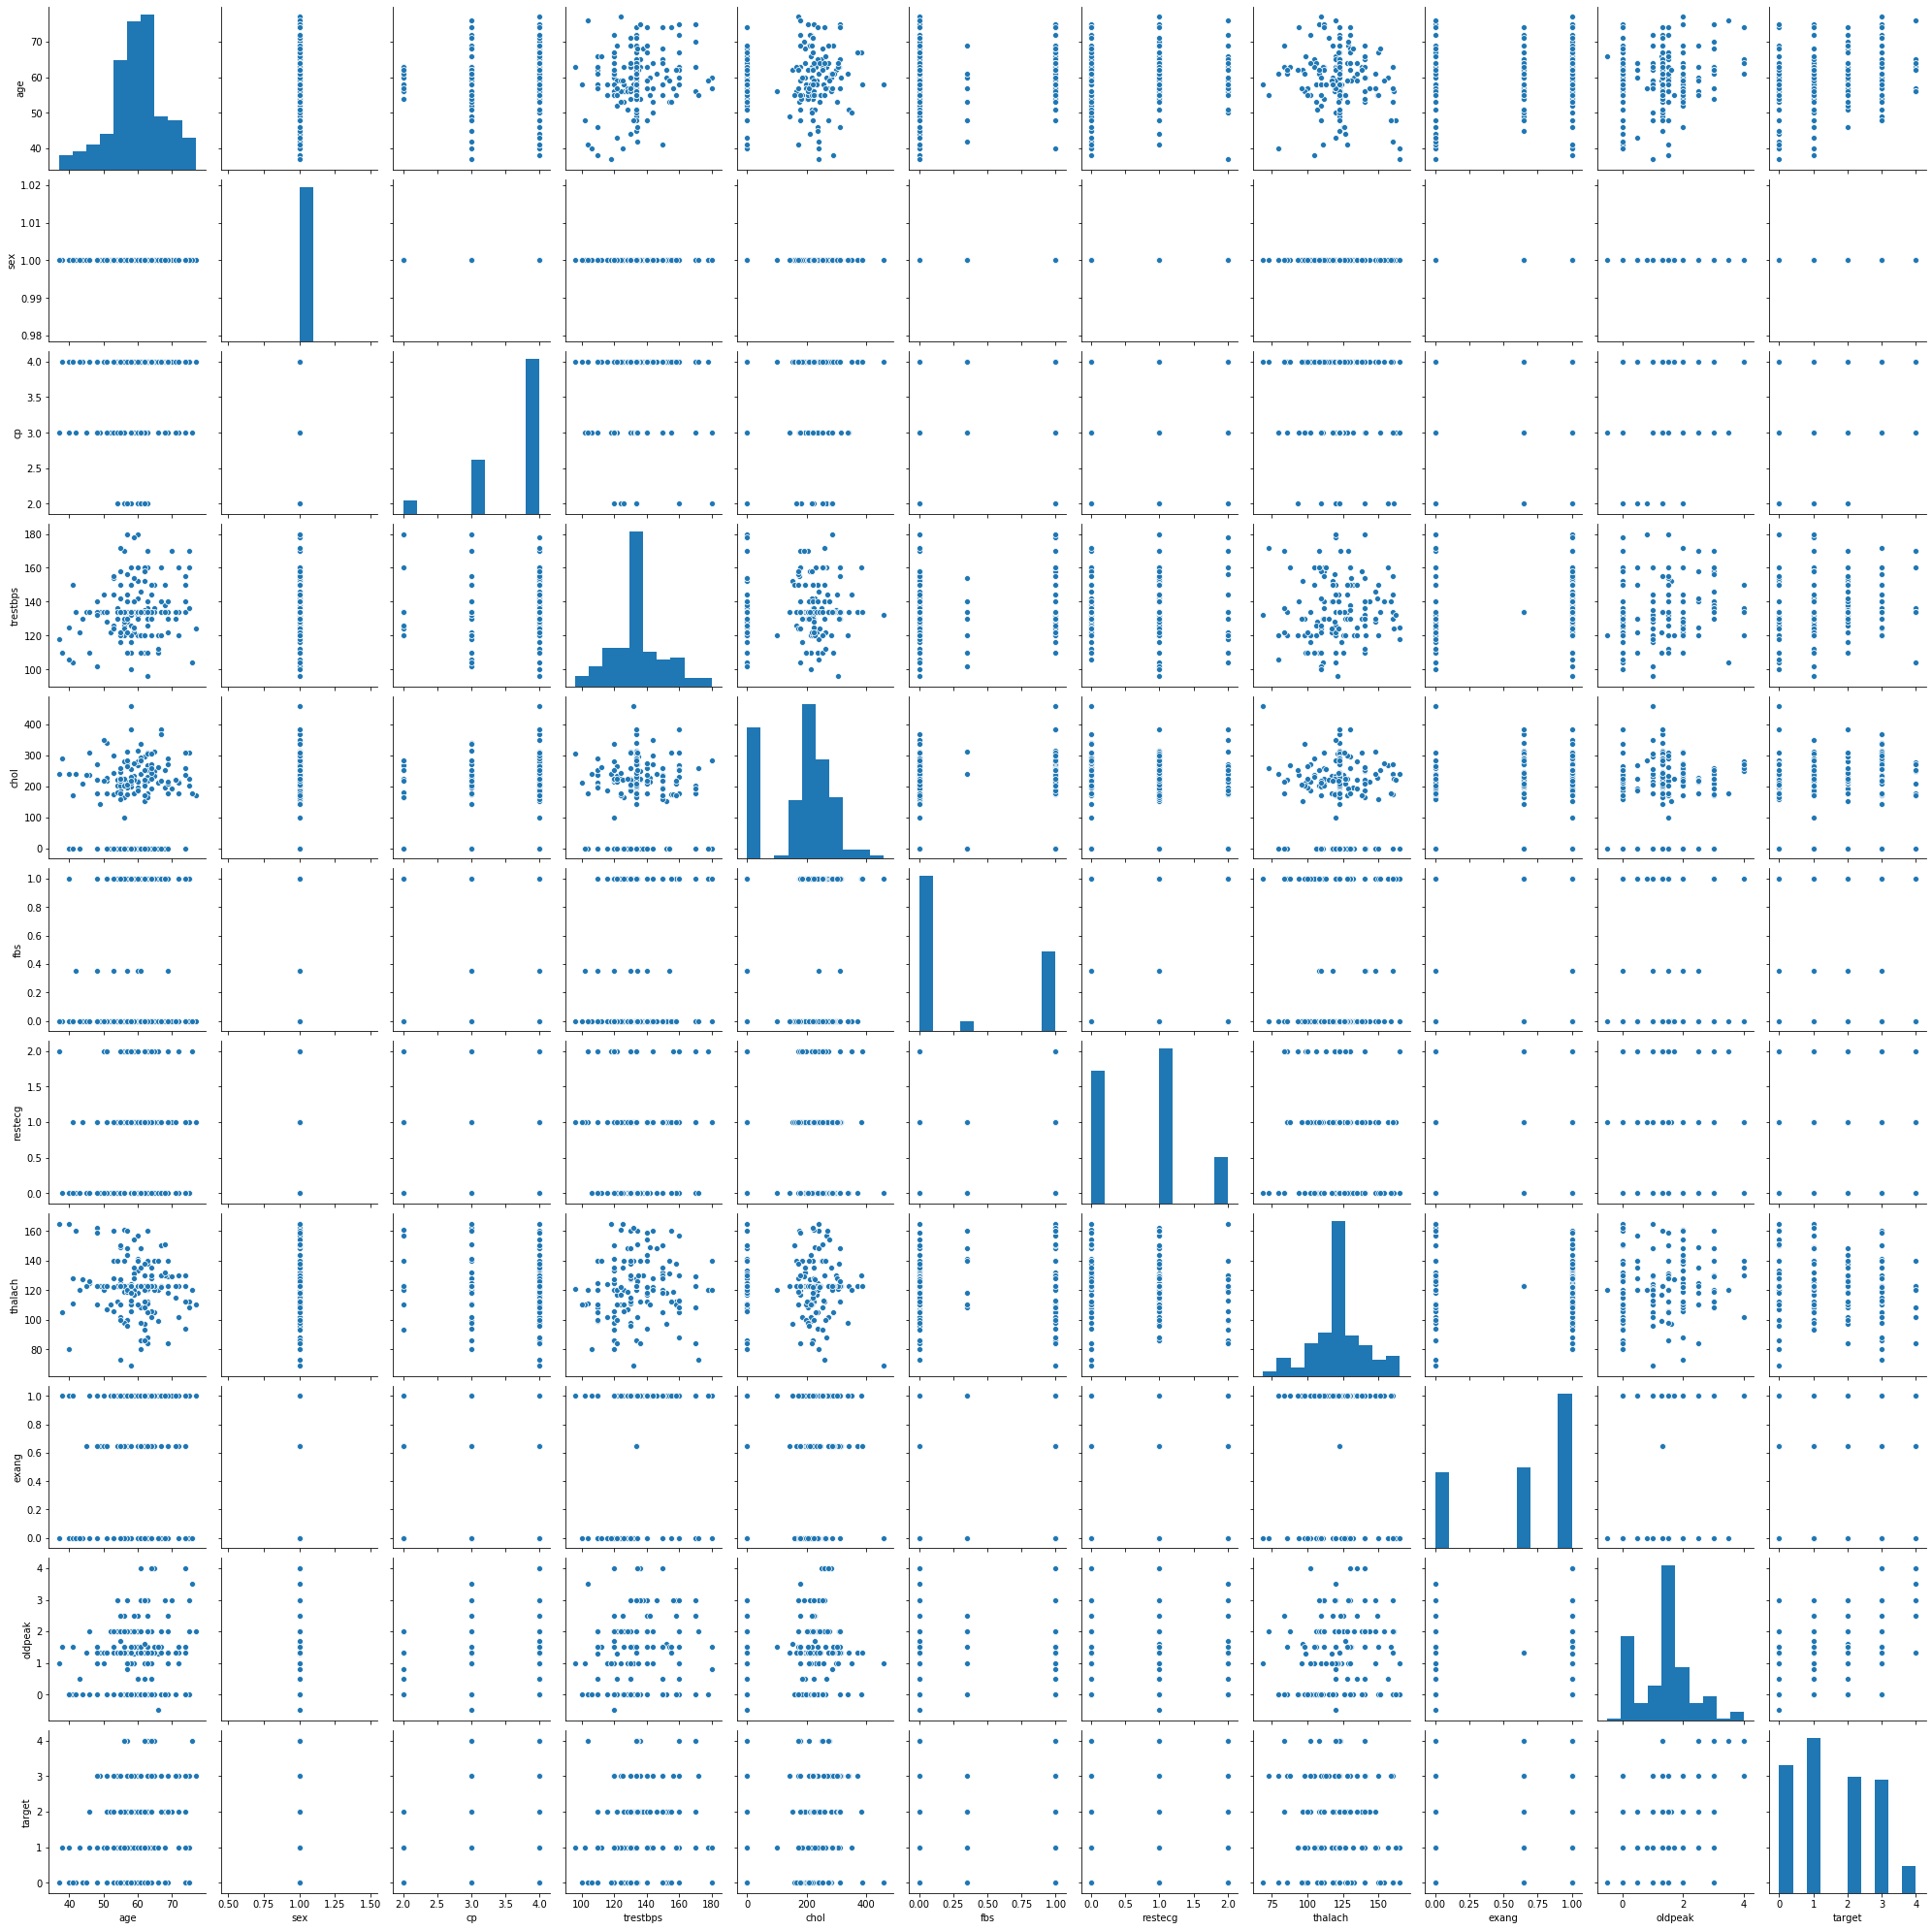

In [68]:
sns.pairplot(df1)

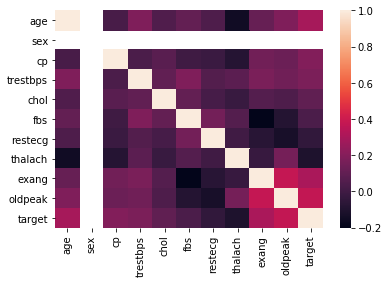

In [69]:
# basically target is highly related with sex only
sns.heatmap(df1.corr())

age            AxesSubplot(0.125,0.536818;0.0945122x0.343182)
sex         AxesSubplot(0.238415,0.536818;0.0945122x0.343182)
cp          AxesSubplot(0.351829,0.536818;0.0945122x0.343182)
trestbps    AxesSubplot(0.465244,0.536818;0.0945122x0.343182)
chol        AxesSubplot(0.578659,0.536818;0.0945122x0.343182)
fbs         AxesSubplot(0.692073,0.536818;0.0945122x0.343182)
restecg     AxesSubplot(0.805488,0.536818;0.0945122x0.343182)
thalach           AxesSubplot(0.125,0.125;0.0945122x0.343182)
exang          AxesSubplot(0.238415,0.125;0.0945122x0.343182)
oldpeak        AxesSubplot(0.351829,0.125;0.0945122x0.343182)
target         AxesSubplot(0.465244,0.125;0.0945122x0.343182)
dtype: object

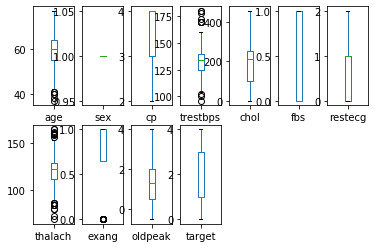

In [70]:
df1.plot(kind='box',subplots=True,layout=(2,7))

In [71]:
X = df1.drop('target',axis=1)
y = df1['target']

In [72]:
from sklearn.model_selection import train_test_split

In [119]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

In [120]:
model=[DecisionTreeClassifier(),SVC(),KNeighborsClassifier()]

In [121]:
import warnings
warnings.filterwarnings('ignore')
max_score=0
for r_state in range(42,101):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=r_state)
    for m in model:    
        m.fit(X_train,y_train)
        pred = m.predict(X_test)
        a = accuracy_score(y_test,pred)
        print(r_state,a)
        if a>max_score:
            max_score = a
            final_r_state = r_state
print(final_r_state,max_score)

42 0.25
42 0.26666666666666666
42 0.2
43 0.26666666666666666
43 0.2833333333333333
43 0.3
44 0.38333333333333336
44 0.2833333333333333
44 0.3
45 0.13333333333333333
45 0.2833333333333333
45 0.2
46 0.2
46 0.31666666666666665
46 0.25
47 0.3
47 0.23333333333333334
47 0.18333333333333332
48 0.23333333333333334
48 0.2
48 0.25
49 0.2833333333333333
49 0.2
49 0.25
50 0.25
50 0.25
50 0.3333333333333333
51 0.25
51 0.23333333333333334
51 0.26666666666666666
52 0.38333333333333336
52 0.3
52 0.21666666666666667
53 0.2833333333333333
53 0.2
53 0.2833333333333333
54 0.2833333333333333
54 0.26666666666666666
54 0.18333333333333332
55 0.31666666666666665
55 0.23333333333333334
55 0.2
56 0.23333333333333334
56 0.31666666666666665
56 0.2833333333333333
57 0.36666666666666664
57 0.31666666666666665
57 0.35
58 0.38333333333333336
58 0.26666666666666666
58 0.3333333333333333
59 0.26666666666666666
59 0.31666666666666665
59 0.3
60 0.26666666666666666
60 0.25
60 0.3333333333333333
61 0.2833333333333333
61 0.

In [122]:
# DTC is the best performer for random state 89
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=89)

In [123]:
for m in model:
    m.fit(X_train,y_train)
    m.score(X_train,y_train)
    predm=m.predict(X_test)
    print('Accuracy Score of',m, 'is: ')
    print(accuracy_score(y_test,predm))

Accuracy Score of DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best') is: 
0.38333333333333336
Accuracy Score of SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False) is: 
0.16666666666666666
Accuracy Score of KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform') is: 
0.23333333333333334


In [124]:
dtc=DecisionTreeClassifier()
dtc.fit(X_train,y_train)
dtcpred=dtc.predict(X_test)
dtcpred

array([2, 3, 3, 0, 1, 0, 3, 1, 3, 1, 0, 0, 2, 1, 4, 2, 0, 3, 1, 3, 0, 1,
       2, 0, 2, 2, 2, 1, 0, 1, 1, 2, 0, 0, 1, 0, 2, 2, 1, 1, 0, 1, 3, 2,
       4, 1, 3, 0, 3, 2, 3, 2, 2, 1, 4, 1, 0, 0, 1, 4], dtype=int64)

In [125]:
accuracy_score(y_test,dtcpred)

0.35

In [126]:
dtc = DecisionTreeClassifier()
params = {'criterion': ['gini','entropy']}
gscv = GridSearchCV(dtc,param_grid=params)
gscv.fit(X_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy']},
             pr

In [127]:
gscv.best_params_

{'criterion': 'entropy'}

In [128]:
dtc=DecisionTreeClassifier(criterion='entropy')
dtc.fit(X_train,y_train)
dtcpred=dtc.predict(X_test)
dtcpred

array([2, 3, 1, 0, 3, 1, 3, 1, 3, 3, 0, 3, 2, 3, 4, 0, 3, 3, 1, 3, 0, 2,
       0, 0, 2, 2, 2, 1, 0, 1, 0, 3, 0, 1, 3, 4, 0, 3, 1, 2, 2, 2, 1, 2,
       2, 2, 0, 2, 3, 2, 2, 3, 0, 1, 1, 1, 1, 1, 2, 4], dtype=int64)

In [129]:
accuracy_score(y_test,dtcpred)

0.25

In [130]:
cvs = cross_val_score(DecisionTreeClassifier(criterion='entropy'),X,y,cv=50)
cvs

array([0.5       , 0.25      , 0.        , 0.25      , 0.25      ,
       0.        , 0.        , 0.        , 0.25      , 0.25      ,
       0.5       , 0.25      , 0.25      , 0.        , 0.25      ,
       0.5       , 0.25      , 0.75      , 0.75      , 0.25      ,
       0.5       , 0.        , 0.25      , 0.25      , 0.        ,
       0.75      , 0.25      , 0.        , 0.        , 0.25      ,
       0.        , 0.33333333, 0.        , 0.        , 0.33333333,
       1.        , 0.33333333, 0.66666667, 0.        , 0.33333333,
       0.33333333, 0.33333333, 0.66666667, 0.33333333, 0.66666667,
       0.33333333, 0.66666667, 0.        , 0.33333333, 0.        ])

In [131]:
cvs.mean()

0.28833333333333333

In [132]:
cvs.max()

1.0

In [133]:
svc=SVC()
svc.fit(X_train,y_train)
svcpred=svc.predict(X_test)
print(accuracy_score(y_test,svcpred))
print(confusion_matrix(y_test,svcpred))
print(classification_report(y_test,svcpred))

0.16666666666666666
[[ 4  6  0  1  0]
 [16  5  0  1  0]
 [ 9  3  0  3  0]
 [ 7  1  0  1  0]
 [ 3  0  0  0  0]]
              precision    recall  f1-score   support

           0       0.10      0.36      0.16        11
           1       0.33      0.23      0.27        22
           2       0.00      0.00      0.00        15
           3       0.17      0.11      0.13         9
           4       0.00      0.00      0.00         3

    accuracy                           0.17        60
   macro avg       0.12      0.14      0.11        60
weighted avg       0.17      0.17      0.15        60



In [134]:
svc = SVC()
params = {'C':[0.0001,0.001,0.01,0.1,1,10],'gamma':[0.1,1,10,100]}
gscv = GridSearchCV(svc,param_grid=params)
gscv.fit(X_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10],
                         'gamma': [0.1, 1, 10, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [135]:
gscv.best_params_

{'C': 0.0001, 'gamma': 0.1}

In [136]:
svc = SVC(C=0.0001,gamma=0.1)
svc.fit(X_train,y_train)
svcpred = svc.predict(X_test)
svcpred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [137]:
accuracy_score(y_test,svcpred)

0.18333333333333332

In [138]:
cvs = cross_val_score(SVC(C=0.0001,gamma=0.1),X,y,cv=50)
cvs

array([0.25      , 0.25      , 0.25      , 0.25      , 0.25      ,
       0.25      , 0.25      , 0.25      , 0.25      , 0.25      ,
       0.25      , 0.25      , 0.25      , 0.25      , 0.25      ,
       0.25      , 0.25      , 0.25      , 0.25      , 0.25      ,
       0.25      , 0.25      , 0.25      , 0.25      , 0.25      ,
       0.25      , 0.25      , 0.25      , 0.25      , 0.25      ,
       0.25      , 0.33333333, 0.66666667, 0.66666667, 0.33333333,
       0.33333333, 0.33333333, 0.33333333, 0.33333333, 0.33333333,
       0.33333333, 0.33333333, 0.33333333, 0.33333333, 0.33333333,
       0.33333333, 0.33333333, 0.33333333, 0.33333333, 0.33333333])

In [139]:
cvs.mean()

0.295

In [140]:
cvs.max()

0.6666666666666666

In [141]:
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)
knnpred=knn.predict(X_test)
knnpred

array([2, 1, 1, 0, 3, 3, 0, 0, 3, 0, 2, 3, 3, 0, 1, 0, 0, 3, 1, 1, 0, 0,
       0, 3, 3, 0, 3, 0, 0, 1, 0, 3, 1, 0, 3, 3, 0, 3, 1, 2, 3, 3, 1, 0,
       2, 3, 0, 1, 3, 3, 1, 2, 2, 1, 1, 1, 2, 0, 0, 0], dtype=int64)

In [142]:
knn = KNeighborsClassifier()
params = {'n_neighbors': range(1,50)}
gscv = RandomizedSearchCV(knn,param_distributions=params)
gscv.fit(X_train,y_train)

RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=KNeighborsClassifier(algorithm='auto',
                                                  leaf_size=30,
                                                  metric='minkowski',
                                                  metric_params=None,
                                                  n_jobs=None, n_neighbors=5,
                                                  p=2, weights='uniform'),
                   iid='deprecated', n_iter=10, n_jobs=None,
                   param_distributions={'n_neighbors': range(1, 50)},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring=None, verbose=0)

In [143]:
gscv.best_params_

{'n_neighbors': 14}

In [144]:
knn=KNeighborsClassifier(n_neighbors=14)
knn.fit(X_train,y_train)
knnpred=knn.predict(X_test)
knnpred

array([2, 2, 1, 0, 3, 3, 0, 1, 3, 3, 2, 3, 3, 3, 1, 3, 0, 3, 1, 2, 0, 0,
       2, 2, 1, 0, 3, 0, 0, 1, 0, 3, 2, 3, 1, 2, 0, 3, 0, 3, 3, 3, 1, 0,
       0, 1, 0, 1, 3, 1, 1, 2, 1, 0, 0, 1, 2, 0, 3, 3], dtype=int64)

In [145]:
accuracy_score(y_test,knnpred)

0.23333333333333334

In [147]:
cvs = cross_val_score(KNeighborsClassifier(n_neighbors=14),X,y,cv=50)
cvs

array([0.25      , 0.25      , 0.25      , 0.25      , 0.25      ,
       0.25      , 0.5       , 0.5       , 0.25      , 0.        ,
       0.75      , 0.        , 0.25      , 0.5       , 0.5       ,
       0.5       , 0.        , 0.75      , 0.25      , 0.25      ,
       0.25      , 0.25      , 0.        , 0.5       , 0.        ,
       0.25      , 0.5       , 0.        , 0.25      , 0.25      ,
       0.        , 0.        , 0.33333333, 0.66666667, 0.        ,
       0.33333333, 0.33333333, 0.66666667, 0.33333333, 0.        ,
       0.66666667, 1.        , 0.33333333, 0.33333333, 0.66666667,
       0.66666667, 0.33333333, 0.66666667, 0.33333333, 0.66666667])

In [148]:
cvs.mean()

0.3416666666666666

In [149]:
cvs.max()

1.0

In [150]:
ad=AdaBoostClassifier(n_estimators=50,base_estimator=DecisionTreeClassifier(),algorithm='SAMME')
ad.fit(X_train,y_train)
predad=ad.predict(X_test)
print(accuracy_score(y_test,predad))
print(confusion_matrix(y_test,predad))
print(classification_report(y_test,predad))

0.3333333333333333
[[4 3 2 2 0]
 [7 9 4 2 0]
 [0 6 6 3 0]
 [3 2 1 1 2]
 [0 2 0 1 0]]
              precision    recall  f1-score   support

           0       0.29      0.36      0.32        11
           1       0.41      0.41      0.41        22
           2       0.46      0.40      0.43        15
           3       0.11      0.11      0.11         9
           4       0.00      0.00      0.00         3

    accuracy                           0.33        60
   macro avg       0.25      0.26      0.25        60
weighted avg       0.33      0.33      0.33        60



In [151]:
rfc = RandomForestClassifier(criterion='entropy')
rfc.fit(X_train,y_train)
rfcpred = rfc.predict(X_test)
rfcpred
print(accuracy_score(y_test,rfcpred))
print(confusion_matrix(y_test,rfcpred))
print(classification_report(y_test,rfcpred))

0.35
[[ 1  7  2  1  0]
 [ 5 12  1  4  0]
 [ 0  5  5  5  0]
 [ 1  2  1  3  2]
 [ 0  1  2  0  0]]
              precision    recall  f1-score   support

           0       0.14      0.09      0.11        11
           1       0.44      0.55      0.49        22
           2       0.45      0.33      0.38        15
           3       0.23      0.33      0.27         9
           4       0.00      0.00      0.00         3

    accuracy                           0.35        60
   macro avg       0.25      0.26      0.25        60
weighted avg       0.34      0.35      0.34        60



In [152]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(X_train,y_train)
gbcpred = gbc.predict(X_test)
gbcpred
print(accuracy_score(y_test,gbcpred))
print(confusion_matrix(y_test,gbcpred))
print(classification_report(y_test,gbcpred))

0.38333333333333336
[[ 4  6  0  1  0]
 [ 5 12  0  5  0]
 [ 3  3  6  2  1]
 [ 3  0  2  1  3]
 [ 0  1  1  1  0]]
              precision    recall  f1-score   support

           0       0.27      0.36      0.31        11
           1       0.55      0.55      0.55        22
           2       0.67      0.40      0.50        15
           3       0.10      0.11      0.11         9
           4       0.00      0.00      0.00         3

    accuracy                           0.38        60
   macro avg       0.32      0.28      0.29        60
weighted avg       0.43      0.38      0.40        60

